# Analyzing FEAST Surveys from Spring 2018
By Hannah Kim

In [30]:
# These lines import computing and analysis packages.
import math
from datascience import *
import numpy as np
import pandas as pd

# These lines set up the plotting functionality and formatting.
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")

## 1) Import and Show Data

In [3]:
#Import the pre-program surveys and sort the names alphabetically
pre = Table.read_table('Pre-Health.csv')
pre.sort(1)
pre.show(1)

Timestamp,"Name (First, Last)",Class Start Date,Class Name,Vital Statistics: Starting weight,Vital Statistics: Disease?,"1. Over the past 3 days, did you have fruits and/or vegetables for: (click all that apply)","2. Over the past 3 days, did you eat any of these fruits or vegetables? (Click all that apply)",3. How often did you drink water?,4. How often did you drink soda?,5. How many meals did you cook at home?,6. How many meals did you eat at a fast food resturant?,7. How many meals did you eat fried foods?,8. About how much do you spend on groceries per week?,9. About how much do you spend on eating out each week?,10. Where do you typically purchase your food?,11. Do you know where the nearest farmer's market is?,"12. How often do you go to the farmer's market? Once a month, once a week, occasionally, never",13. Which of the following cooking methods do you do most often at home?,14. Do you feel able to identify healthy foods?,15. Do you read nutrition labels?,"16. If yes, when you read the nutrition label on the back of a food package, do you feel confident that you can tell which foods are healthy to eat?",16. How confident are you that you can identify healthy foods in your supermarket or store?,17. How confident are you that you will be able to make healthy changes during your time with Groceryships?,I do not have access to healthy food near my home.,I do not have time to go to the grocery store.,I do not have a kitchen.,It is hard to afford healthy food.,My family does not support my healthy choices.,My family members do not want to eat healthy food.,"I eat when I am stressed, sad, or bored.",I do not have time to cook.,I do not know how to cook.,I do not like a lot of healthy food.,19. Have you or your family ever been diagnosed with any of the following? (Click all that apply),20. Has your doctor ever told you or your family that you need to eat healthier because of your health or medical condition?,"1. I feel that I am a person of worth, at least on an equal plane with others.",2. I feel that I have a number of good qualities.,3. I feel that I am a failure.,4. I am able to do things as well as most other people.,5. I feel I do not have much to be proud of.,6. I take a positive attitude toward myself.,7. I am generally satisfied with my life.,8. I wish I could have more respect for myself.,9. I feel useless at times.,10. At times I think I am no good.,1. How would you rate your quality of life?,2. How satisfied are you with your health?,3. How often do you feel that physical pain prevents you from doing what you need to do?,4. Do you need any medical treatment to function in your daily life?,5. How much do you enjoy life?,6. Do you feel your life is meaningful?,7. Do you have enough energy for everyday life?,8. Are you able to accept your physical appearance?,9. Do you have enough money to meet your needs?,"10. How often do you have negative feelings, such as, blue mood, despair, anxiety, depression?","Thinking about all the sources of income in your household, where does your income come from? (Click as many as apply)",What is your race? (Click as many as applies),"Do you consider yourself to be Hispanic, Latino, or of Spanish origin?",What is your total monthly household income? Please include all members who are contributing to your household.
2018/06/28 11:19:27 AM MDT,"Araceli, Celestino",2018-01-18,With Love,127,nan,Breakfast,Oranges;Apples;Grapes;Bananas;Peaches;Lettuce;Tomatoes;Carrots;Cucumbers;Spinach,Multiple Times Per Day,Never,Multiple Times Per Day,Once a Week,Once a Week,$101+,$101+,Farmer's Market,Yes,Occasionally,Steaming;Frying,Yes,No,Yes,Somewhat Confident,Very Confident,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4,4,1,4,1,4,4,1,1,1,Very Good,4,Occasionally,Never,Every Day,Every Day,Often,Often,Occasionally,Occasionally,SNAP/Cal Fresh,Latino/Hispano,Yes,$751 - $1000


In [4]:
prenames = pre.column(1)
print(prenames)

['Araceli, Celestino ' 'Herlinda, Rosales' 'Rosa, Vargas '
 'Azucena, Santiago' 'Maria M, Perez' 'Rosemary, Zeledon'
 'Heidy Orquidia, Chinchilla Yihla' 'Mirea, Gonzalez' 'Eladio, Mendoza'
 'Beatriz, Lovera ' 'Mirna, Vargas' 'Gelasia, Garcia' 'Estela, Ojeda'
 'Esther Cristina, Flores' 'Maria, Valdes' 'Marta Gladys, Chavez'
 'Francisca, Herndandez' 'Veronica, Coto' 'Marcela, Diaz'
 'Rosaura, Santiago' 'Marinela, Arevalo' 'Lucero, Noyola' 'Carmen, Noyola'
 'Rosa, Morales ' 'Sagrario, Lopez ' 'Martha, Padilla ' 'Sonia, Quero'
 'Maria R, Meza ' 'Irene, Jimenez' 'Alma, Maldonado' 'Lucia, Lopez'
 'Violeta, Moreno' 'Xochitl, Ruiz' 'Delia, Huizar' 'Teresa, Francisco'
 'Milagro, Martinez' 'Dolores Aguilar' 'Maria, Palomares' 'Martha A, Lopez'
 'Reyna, Bautista' 'Maria, Rodezno' 'Maria, Morales' 'Maria, Moreno'
 'Barbara, Coleman' 'Carmen, Moreno' 'Cinthia, Cano' 'Paula, Dominguez'
 'Romerol, Malveaux' 'Carol A, Powell']


In [5]:
#How many entries of pre-program surveys are there?
len(pre.rows)

49

In [6]:
#Import the post-program surveys and sort the names alphabetically
post = Table.read_table('Post-Health.csv')
post.show()

Timestamp,"Name (First, Last)",Class Start Date,"1. Over the past 3 days, did you have fruits and/or vegetables for: (click all that apply)","2. Over the past 3 days, did you eat any of these fruits or vegetables? (Click all that apply)","2a. By the end of this program, have you increased the KINDS of fruits and vegetables you consume?","2b. By the end of this program, have you increased the AMOUNT of times per day you consumed fruits and vegetables?",3. How often did you drink water?,4. How often did you drink soda?,5. How many meals did you cook at home?,6. How many meals did you eat at a fast food resturant?,7. How many meals did you eat fried foods?,8. About how much do you spend on groceries per week?,9. About how much do you spend on eating out each week?,10. Where do you typically purchase your food?,11. Do you know where the nearest farmer's market is?,12. How often do you go to the farmer's market?,13. Do you feel more able to find and shop for healthy foods after the program?,14. Which of the following cooking methods do you do most often at home?,15. Do you read nutrition labels?,"16. If yes, when you read the nutrition label on the back of a food package, how confident do you feel that you can tell which foods are healthy to eat?",17. How confident are you that you can identify healthy foods in your supermarket or store?,18. How confident are you that you will be able to make healthy changes during your time with Groceryships?,I do not have access to healthy food near my home.,I do not have time to go to the grocery store.,I do not have a kitchen.,It is hard to afford healthy food.,My family does not support my healthy choices.,My family members do not want to eat healthy food.,"I eat when I am stressed, sad, or bored.",I do not have time to cook.,I do not know how to cook.,I do not like a lot of healthy food.,20. Have you or your family ever been diagnosed with any of the following? (Click all that apply),"21. If, yes, have you or your family seen an improvement in your pre-existing dietary disease due to the program?","1. I feel that I am a person of worth, at least on an equal plane with others.",2. I feel that I have a number of good qualities.,3. I feel that I am a failure.,4. I am able to do things as well as most other people.,5. I feel I do not have much to be proud of.,6. I take a positive attitude toward myself.,7. I am generally satisfied with my life.,8. I wish I could have more respect for myself.,9. I feel useless at times.,10. At times I think I am no good.,1. How would you rate your quality of life?,2. How satisfied are you with your health?,3. How often do you feel that physical pain prevents you from doing what you need to do?,4. Do you need any medical treatment to function in your daily life?,5. How much do you enjoy life?,6. Do you feel your life is meaningful?,7. Do you have enough energy for everyday life?,8. Are you able to accept your physical appearance?,9. Do you have enough money to meet your needs?,"10. How often do you have negative feelings, such as, blue mood, despair, anxiety, depression?"
2018/06/28 12:19:05 PM MDT,"Rosemary, Zeledon",2018-01-18,Breakfast;Dinner,Oranges;Apples;Grapes;Bananas;Pineapple;Lettuce;Tomatoes;Carrots;Cucumbers;Celery;Spinach; ...,Yes,Yes,Multiple Times Per Day,Once a Week,Once a Week,Once a Week,Once a Week,$101+,$5 - $20,Farmer's Market,Yes,Occasionally,Yes,Steaming,Yes,Very confident,Somewhat Confident,nan,Extremely Affected,Extremely Affected,Not at all affected,Not very affected,Somewhat Affected,Extremely Affected,Extremely Affected,Extremely Affected,Not at all affected,Extremely Affected,Diabetes,Yes,4,4,1,4,2,4,4,4,1,1,Very Good,4,Occasionally,Never,Every Day,Every Day,Often,Often,Never,Occasionally
2018/06/28 12:27:43 PM MDT,"Rosa, Vargas",2018-01-18,Breakfast;Lunch;Dinner;Snack,Apples;Bananas;Lettuce;Tomatoes;Carrots;Cucumbers;Other,nan,nan,Multiple Times Per Day,Once a Week,A Few Times a Week,Once a Week,A Few Times a Week,nan,$5 - $20,Grocery S

In [7]:
postnames = post.column(1)
print(postnames)

['Rosemary, Zeledon' 'Rosa, Vargas ' 'Maria M, Perez ' 'Herlinda, Rosales '
 'Araceli, Celestino ' 'Azucena, Santiago' 'Jose H, Guardado '
 'Francisca, Hernandez ' 'Irene, Jimenez' 'Beatriz, Lovera'
 'Mirea, Gonzalez' 'Gelasia, Garcia' 'Mirna, Vargas' 'Maria, Valdes'
 'Eladio, Mendoza' 'Estela, Ojeda' 'Heidy Orquidia, Chinchilla Yihla'
 'Marta, Chavez' 'Esther Cristina, Flores' 'Veronica, Coto '
 'Marinela, Arevalo' 'Marcela, Diaz ' 'Rosaura, Santiago' 'Lucero, Noyola'
 'Carmen, Noyola' 'Rosa, Morales' 'Sagrario, Lopez' 'Martha, Padilla'
 'Sonia, Quero' 'Anabel, Palacios' 'Maria R, Meza' 'Lucia, Lopez'
 'Alma, Maldonado' 'Violeta, Moreno' 'Xochitl, Ruiz' 'Lidia, Perez'
 'Delia, Huizar' 'Teresa, Francisco' 'Milagro, Martinez' 'Maria, Palomares'
 'Martha A, Lopez' 'Reyna, Bautista' 'Marina, Rodezno' 'Maria, Morales'
 'Maria, Moreno' 'Barbara, Coleman' 'Roberto, Ruiz' 'Cinthia, Cano'
 'Paula, Dominguez' 'Romerol, Malveaux' 'Carol A, Powell' 'Linda, Rubio'
 'Luis Antonio, Salazar' 'Saira, 

In [8]:
#How many entries of post-program surveys are there?
len(post.rows)

54

### Note: There are five fewer pre-surveys than post-surveys.

In [9]:
#Combine the pre and post program survey information
combined = pre.join("Name (First, Last)", post, "Name (First, Last)")
combined.show(5)

"Name (First, Last)",Timestamp,Class Start Date,Class Name,Vital Statistics: Starting weight,Vital Statistics: Disease?,"1. Over the past 3 days, did you have fruits and/or vegetables for: (click all that apply)","2. Over the past 3 days, did you eat any of these fruits or vegetables? (Click all that apply)",3. How often did you drink water?,4. How often did you drink soda?,5. How many meals did you cook at home?,6. How many meals did you eat at a fast food resturant?,7. How many meals did you eat fried foods?,8. About how much do you spend on groceries per week?,9. About how much do you spend on eating out each week?,10. Where do you typically purchase your food?,11. Do you know where the nearest farmer's market is?,"12. How often do you go to the farmer's market? Once a month, once a week, occasionally, never",13. Which of the following cooking methods do you do most often at home?,14. Do you feel able to identify healthy foods?,15. Do you read nutrition labels?,"16. If yes, when you read the nutrition label on the back of a food package, do you feel confident that you can tell which foods are healthy to eat?",16. How confident are you that you can identify healthy foods in your supermarket or store?,17. How confident are you that you will be able to make healthy changes during your time with Groceryships?,I do not have access to healthy food near my home.,I do not have time to go to the grocery store.,I do not have a kitchen.,It is hard to afford healthy food.,My family does not support my healthy choices.,My family members do not want to eat healthy food.,"I eat when I am stressed, sad, or bored.",I do not have time to cook.,I do not know how to cook.,I do not like a lot of healthy food.,19. Have you or your family ever been diagnosed with any of the following? (Click all that apply),20. Has your doctor ever told you or your family that you need to eat healthier because of your health or medical condition?,"1. I feel that I am a person of worth, at least on an equal plane with others.",2. I feel that I have a number of good qualities.,3. I feel that I am a failure.,4. I am able to do things as well as most other people.,5. I feel I do not have much to be proud of.,6. I take a positive attitude toward myself.,7. I am generally satisfied with my life.,8. I wish I could have more respect for myself.,9. I feel useless at times.,10. At times I think I am no good.,1. How would you rate your quality of life?,2. How satisfied are you with your health?,3. How often do you feel that physical pain prevents you from doing what you need to do?,4. Do you need any medical treatment to function in your daily life?,5. How much do you enjoy life?,6. Do you feel your life is meaningful?,7. Do you have enough energy for everyday life?,8. Are you able to accept your physical appearance?,9. Do you have enough money to meet your needs?,"10. How often do you have negative feelings, such as, blue mood, despair, anxiety, depression?","Thinking about all the sources of income in your household, where does your income come from? (Click as many as apply)",What is your race? (Click as many as applies),"Do you consider yourself to be Hispanic, Latino, or of Spanish origin?",What is your total monthly household income? Please include all members who are contributing to your household.,Timestamp_2,Class Start Date_2,"1. Over the past 3 days, did you have fruits and/or vegetables for: (click all that apply)_2","2. Over the past 3 days, did you eat any of these fruits or vegetables? (Click all that apply)_2","2a. By the end of this program, have you increased the KINDS of fruits and vegetables you consume?","2b. By the end of this program, have you increased the AMOUNT of times per day you consumed fruits and vegetables?",3. How often did you drink water? _2,4. How often did you drink soda? _2,5. How many meals did you cook at home? _2,6. How many meals did you eat at a fast food resturant? _2,7. How many meals did you eat fried foods?_2,8. About how much d

In [10]:
## Compare the names from the pre and post-program surveys to see if they match up.
match = []
for x in prenames:
    for y in postnames:
        if x == y: 
            match += [1]
            
len(match)
#Here there are 35 matches, exactly the same as with the combined table above.
#However, shouldn't there be 49 matches? Assuming that everyone who did a pre-program survey did a post-program survey
#But maybe, only 35 people that did a pre-program survey did a post-program survey
#I should compare the two name columns from pre and post to be sure

35

In [11]:
#Import the spreadsheet about the missing information 
missing = Table.read_table("2 - FEASTMissingSurveyInfo.csv")
missing = missing.where("Organization", are.not_equal_to("nan"))
missing.show()

Organization,Name,Survey: Pre,Survey: Post,Solicitud de Participación,Weight: Pre,Weight: Post,Completed Program?
BHC,"Linda, Rubio",N,nan,nan,158.8,162.5,nan
BHC,"Saira, Dominguez",N,nan,N,164.2,161,nan
BHC,"Luis Antonio, Salazar",N,nan,N,412,412,nan
BHC,"Cinthia, Cano",nan,nan,nan,139.4,136,nan
BHC,"Eugenia, Ventura",N,N,N,131.6,127,nan
BHC,"Paula, Dominguez",nan,nan,nan,138,128,nan
BHC,"Carol A, Powell",nan,nan,nan,227.1,225.1,nan
BHC,"Romerol, Malveaux",nan,nan,nan,181,175.5,nan
St. Joseph,"Maria, Palomares",nan,nan,nan,205,209,nan
St. Joseph,"Martha A, Lopez",nan,nan,nan,159,169,nan


In [25]:
organization = missing.group("Organization")
organization.relabel("count", "Count")

Organization,Count
APCH,7
BHC,8
Children's Institute,14
Hola,8
Manzanita,3
O'Donovan,6
St. Joseph,11
With Love,9


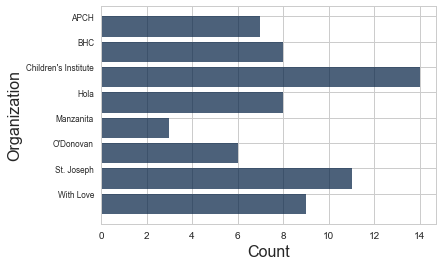

In [31]:
#Visualize the number of participants for each location
organization.barh("Organization")

In [57]:
weights = missing.select("Name", "Weight: Pre", "Weight: Post")
weights.show()
#Lots of missing values - we must clean those up!

Name,Weight: Pre,Weight: Post
"Linda, Rubio",158.8,162.5
"Saira, Dominguez",164.2,161
"Luis Antonio, Salazar",412,412
"Cinthia, Cano",139.4,136
"Eugenia, Ventura",131.6,127
"Paula, Dominguez",138,128
"Carol A, Powell",227.1,225.1
"Romerol, Malveaux",181,175.5
"Maria, Palomares",205,209
"Martha A, Lopez",159,169


In [59]:
#Visualize the weight loss overall
#Just graphing the data where we have both the pre and post-program weight available
weights = weights.where("Weight: Pre", are.not_equal_to("N"))
weights = weights.where("Weight: Post", are.not_equal_to("N"))
weights

Name,Weight: Pre,Weight: Post
"Linda, Rubio",158.8,162.5
"Saira, Dominguez",164.2,161
"Luis Antonio, Salazar",412,412
"Cinthia, Cano",139.4,136
"Eugenia, Ventura",131.6,127
"Paula, Dominguez",138,128
"Carol A, Powell",227.1,225.1
"Romerol, Malveaux",181,175.5
"Maria, Palomares",205,209
"Martha A, Lopez",159,169


In [63]:
#Convert the weight values from strings to floats
weights.apply(float, 1)
weights.apply(float, 2)
weights.show()

Name,Weight: Pre,Weight: Post
"Linda, Rubio",158.8,162.5
"Saira, Dominguez",164.2,161
"Luis Antonio, Salazar",412,412
"Cinthia, Cano",139.4,136
"Eugenia, Ventura",131.6,127
"Paula, Dominguez",138,128
"Carol A, Powell",227.1,225.1
"Romerol, Malveaux",181,175.5
"Maria, Palomares",205,209
"Martha A, Lopez",159,169


In [67]:
for x in weights.column(1):
    if x == str: 
        print(False)


In [61]:
#Show the distribution of weight before and after
weights.hist("Weight: Pre")

ValueError: The column 'Weight: Pre' contains non-numerical values. A histogram cannot be drawn for this table.